In [1]:
#importing pandas and numpy
import numpy as np 
import pandas as pd

#importing matplotlib and seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()
pd.set_option('display.max_rows', None)


In [2]:
# reading the csv file to store it under the name df
df=pd.read_csv("online_shoppers_intention.csv")

In [3]:
#Data Preprocessing
print(df.shape)

(12330, 18)


In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df["OperatingSystems"] = df["OperatingSystems"].astype(object)
df["Browser"] = df["Browser"].astype(object)
df["Region"] = df["Region"].astype(object)
df["TrafficType"] = df["TrafficType"].astype(object)



In [8]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Text(0, 0.5, 'Count')

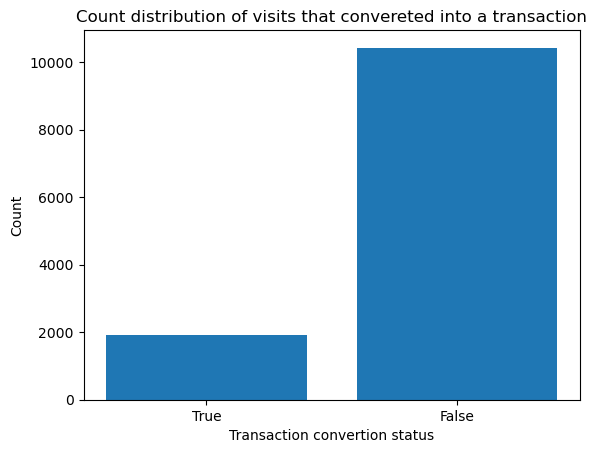

In [9]:
#Univariate data analysis
#Revenue- Class label indicating whether the visit has been finalized with a transaction
true_count = df['Revenue'].sum()
false_count = len(df) - true_count
plt.bar(['True', 'False'], [true_count, false_count])
plt.title('Count distribution of visits that convereted into a transaction')
plt.xlabel('Transaction convertion status')
plt.ylabel('Count')

In [10]:
# Count of each Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
vis_count=df['VisitorType'].value_counts()
print(vis_count)

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


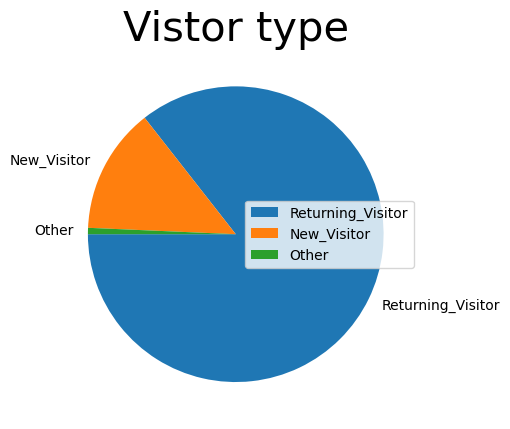

In [11]:
plt.pie(vis_count, labels=vis_count.index, startangle=180)
plt.title('Vistor type', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64


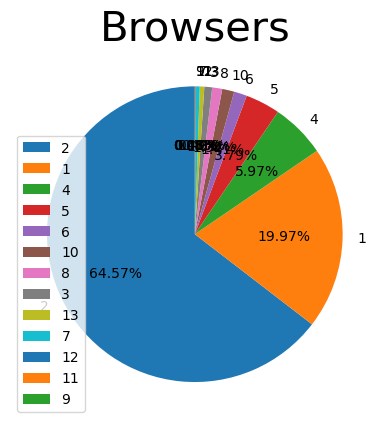

In [12]:
#Browser of the visitor
browser_count=df['Browser'].value_counts()
print(browser_count)
plt.pie(browser_count, labels=browser_count.index,autopct = '%.2f%%', startangle=90)
plt.title('Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x15e3d2010>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

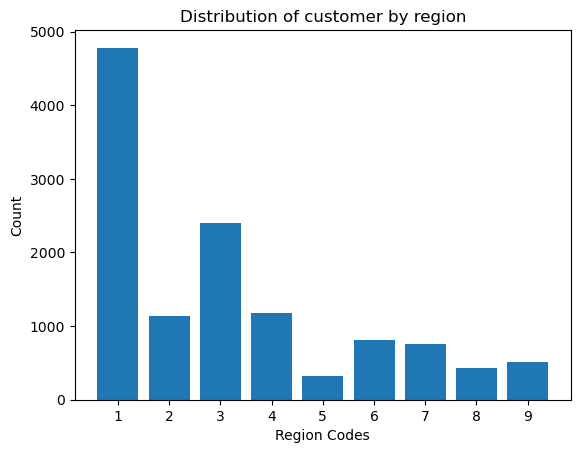

In [13]:
#Region- Geographic region from which the session has been started by the visitor
region_count=df['Region'].value_counts()
print(region_count)
bins = np.arange(df['Region'].min() - 0.5, df['Region'].max() + 1.5, 1)
plt.hist(df['Region'],bins=bins,rwidth=0.8)
plt.title('Distribution of customer by region')
plt.xlabel('Region Codes')
plt.ylabel('Count')
plt.xticks(np.arange(1, 10, 1)) 

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x15e4635d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

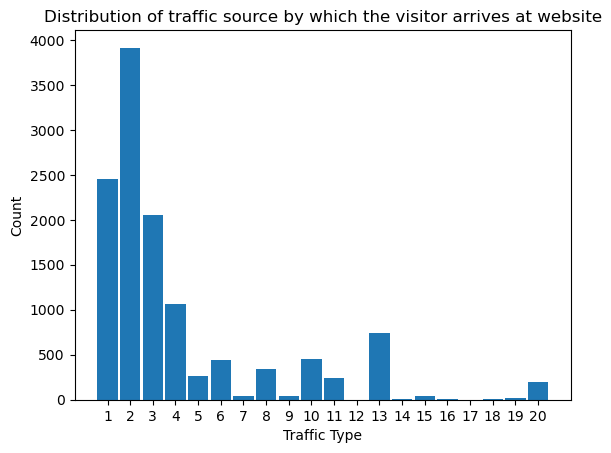

In [14]:
#TrafficType-Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
traffic_count=df['TrafficType'].value_counts()
print(traffic_count)
bins = np.arange(df['TrafficType'].min() - 0.5, df['TrafficType'].max() + 1.5, 1)
plt.hist(df['TrafficType'],bins=bins,rwidth=0.9)
plt.title('Distribution of traffic source by which the visitor arrives at website')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(np.arange(1, 21, 1))

In [15]:
#Os-Operating system of the visitor
Os_count=df['OperatingSystems'].value_counts()
print(Os_count)

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


Text(0.5, 1.0, 'Monthwise visits count')

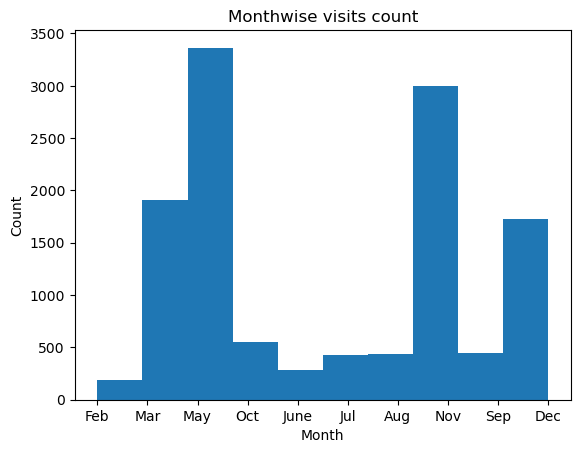

In [16]:
#Month-Month value of the visit date
Month_count= df['Month'].value_counts()
print(Month_count)
#Printing the histogram to view the month with max visits
plt.hist(df['Month'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthwise visits count')

Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499


Text(0.5, 1.0, 'Count of Revenue vs. Weekend')

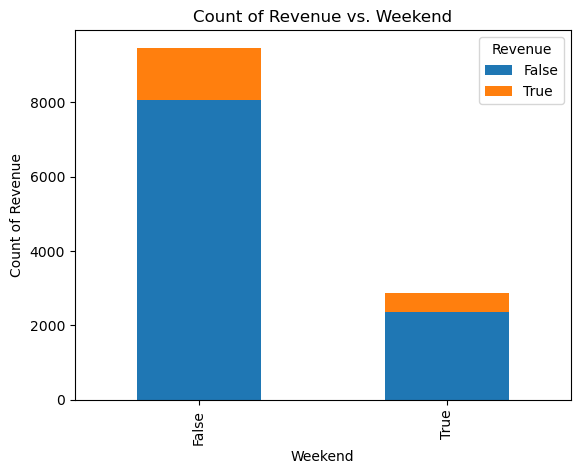

In [17]:
#Bivariate analysis
# Group by 'Weekend' and count the occurrences of revenue
revenue_count = df.groupby(['Weekend', 'Revenue']).size().unstack()
print(revenue_count)
# Plotting the graph
revenue_count.plot(kind='bar', stacked=True)
plt.xlabel('Weekend')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. Weekend')

In [18]:
revenue_count.loc[False,False] = revenue_count.loc[False,False]/5
revenue_count.loc[False,True] = revenue_count.loc[False,True]/5
revenue_count.loc[True,False] = revenue_count.loc[True,False]/2
revenue_count.loc[True,True] = revenue_count.loc[True,True]/2

Revenue   False  True 
Weekend               
False    1610.6  281.8
True     1184.5  249.5


Text(0.5, 1.0, 'Count of Revenue vs. Weekend')

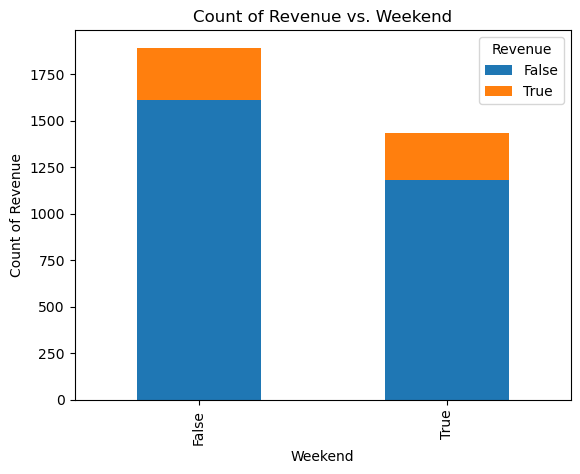

In [19]:
print(revenue_count)
# Plotting the graph
revenue_count.plot(kind='bar', stacked=True)
plt.xlabel('Weekend')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. Weekend')

In [20]:
249.5/1184.5

0.21063739974672857

In [21]:
281.8/1610.6

0.1749658512355644

Text(0.5, 1.0, 'Count of Revenue vs. TrafficType')

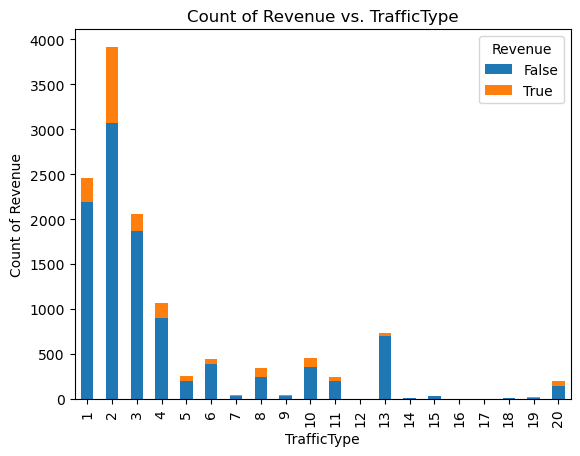

In [22]:
# Group by 'TrafficType' and count the occurrences of revenue
traffic_type_count = df.groupby(['TrafficType', 'Revenue']).size().unstack()
# Plotting the graph
traffic_type_count.plot(kind='bar', stacked=True)
plt.xlabel('TrafficType')
plt.ylabel('Count of Revenue')
plt.title('Count of Revenue vs. TrafficType')

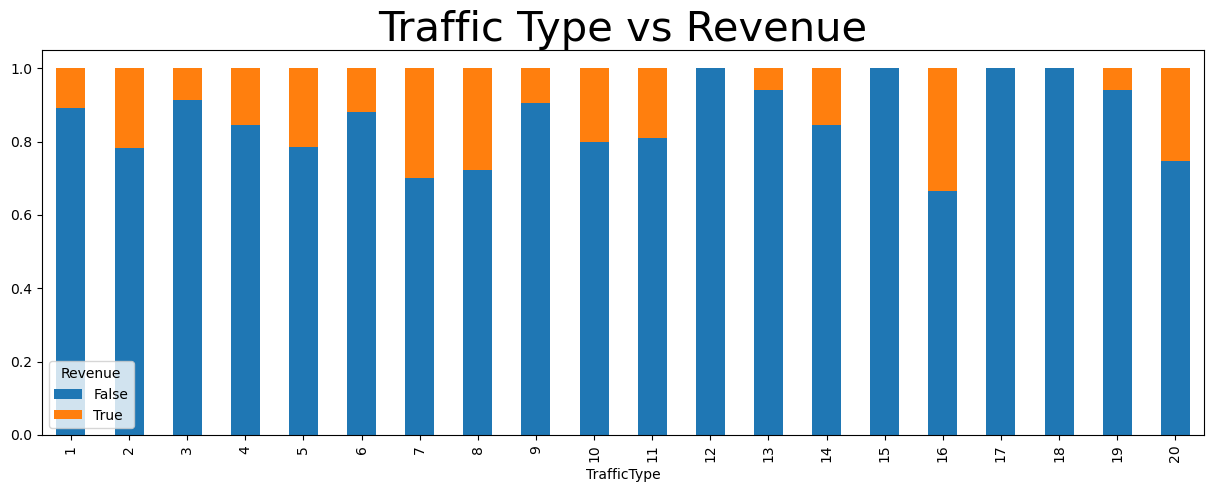

In [23]:
#Normalised for easy visualisation
df2 = pd.crosstab(df['TrafficType'], df['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

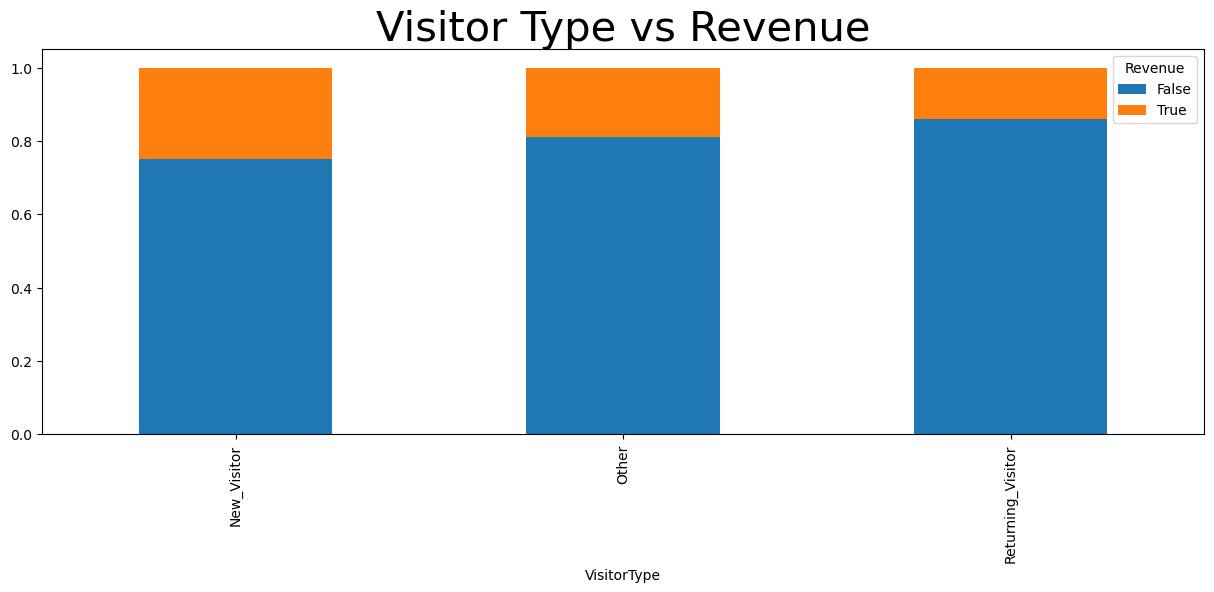

In [24]:
df3 = pd.crosstab(df['VisitorType'], df['Revenue'])
df3.div(df3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

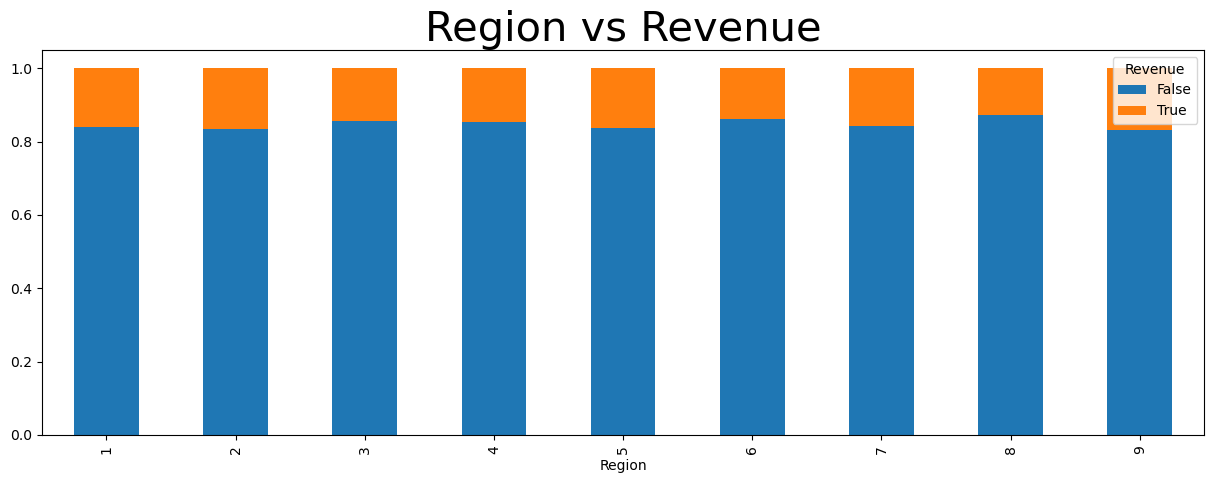

In [25]:
df4 = pd.crosstab(df['Region'], df['Revenue'])
df4.div(df4.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

In [26]:
# Correlation matrix
var = data.columns #['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF']


my_corr_matrix = data.corr(numeric_only=True)

#my_corr_matrix

NameError: name 'data' is not defined

<Axes: >

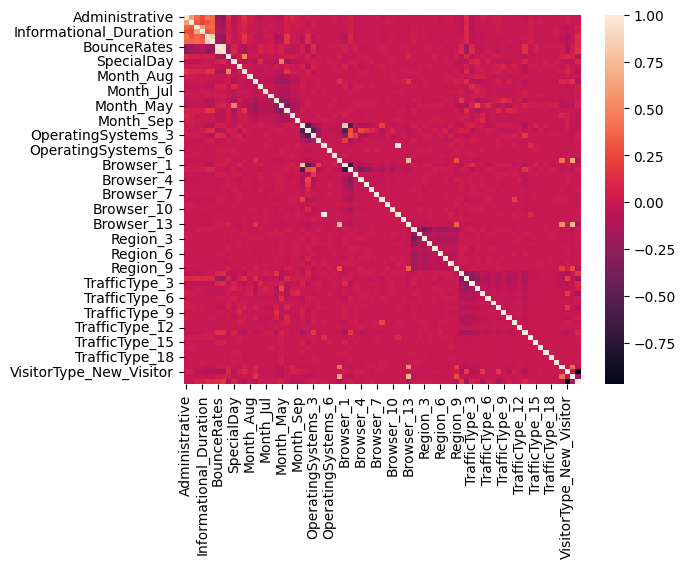

In [65]:
# plot a heatmap for the correlation matrix

sns.heatmap(my_corr_matrix )

In [32]:
s = my_corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print(so)

VisitorType_Returning_Visitor  VisitorType_New_Visitor         -0.971911
VisitorType_New_Visitor        VisitorType_Returning_Visitor   -0.971911
Browser_2                      Browser_1                       -0.674252
Browser_1                      Browser_2                       -0.674252
Browser_2                      OperatingSystems_1              -0.578602
OperatingSystems_1             Browser_2                       -0.578602
                               OperatingSystems_2              -0.552847
OperatingSystems_2             OperatingSystems_1              -0.552847
OperatingSystems_3             OperatingSystems_2              -0.548785
OperatingSystems_2             OperatingSystems_3              -0.548785
Browser_1                      OperatingSystems_2              -0.529652
OperatingSystems_2             Browser_1                       -0.529652
Region_3                       Region_1                        -0.391479
Region_1                       Region_3            

In [27]:
y=df['Revenue']

#converting the categorical variables into dummies or indicator variables
data = pd.get_dummies(df)
x_data=data.drop(['Revenue'], axis = 1)
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 74)
Shape of y_train : (8631,)
Shape of x_test : (3699, 74)
Shape of y_test : (3699,)


In [29]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
 
# Assuming X_train and y_train are your feature matrix and target variable respectively
# X_train.shape = (n_samples, n_features)
# y_train.shape = (n_samples,)
 
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the dataset
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled dataset
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)

Shape of resampled dataset: (14690, 74) (14690,)


In [30]:
#UPDATED BY MD
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    x_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

# Print the shapes of the resampled train-test split
print("Shape of x_train_resampled:", x_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of x_test_resampled:", x_test_resampled.shape)
print("Shape of y_test_resampled:", y_test_resampled.shape)


Shape of x_train_resampled: (10283, 74)
Shape of y_train_resampled: (10283,)
Shape of x_test_resampled: (4407, 74)
Shape of y_test_resampled: (4407,)


In [31]:
x_train_resampled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
7615,0,0.0,0,0.0,3,79.500000,0.000000,0.066667,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
11603,0,0.0,0,0.0,30,1682.275000,0.000000,0.014286,41.133369,0.0,...,False,False,False,False,False,False,False,False,False,True
2245,2,45.0,0,0.0,22,1662.733333,0.000000,0.030159,5.997143,1.0,...,False,False,False,False,False,False,False,False,False,True
4165,6,453.6,2,12.0,73,1889.833333,0.010256,0.018884,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
7799,0,0.0,0,0.0,10,305.000000,0.000000,0.020000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True


In [1]:
#Chi Square Tests
#from scipy.stats import chisquare



#chisquare(df.loc[:,"Revenue"], df.iloc[:,0])
print()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Run the Logistic Regression Model: 

## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
pred_prob = logreg.predict_proba(x_test)[:,1]
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train, y_train))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
#print('Precision of logistic regression classifier on test set:', (precision_score(y_test, y_pred)))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))
#pred_prob = logreg.predict_proba(x_test)[:,1]
#print("Weighted ROC_AUC = ",roc_auc_score(y_test, pred_prob, multi_class="ovr", average="weighted"))

Accuracy of logistic regression classifier on train set:  0.889120611748349
Accuracy of logistic regression classifier on test set:  0.8740200054068668
AUC for logistic regression: 0.8899996551533157


/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#UPDATED BY MD
## (a) Define function, train the model. Report coefficient. #RESAMPLED
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)
logreg.fit(x_train_resampled, y_train_resampled)
y_pred=logreg.predict(x_test_resampled)
pred_prob = logreg.predict_proba(x_test_resampled)[:,1]
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test_resampled, y_test_resampled))
#print('Precision of logistic regression classifier on test set:', (precision_score(y_test, y_pred)))
print("AUC for logistic regression:", roc_auc_score(y_test_resampled, pred_prob))

Accuracy of logistic regression classifier on train set:  0.8248565593698337
Accuracy of logistic regression classifier on test set:  0.821647379169503
AUC for logistic regression: 0.919252410747754


/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Run the Logistic Regression Model: Scaled

## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)
logreg.fit(xstd_train, ystd_train)
ystd_pred=logreg.predict(xstd_test)
pred_prob = logreg.predict_proba(xstd_test)[:,1]
print('Accuracy of logistic regression classifier on train set: ', logreg.score(xstd_train, ystd_train))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(xstd_test, ystd_test))
#print('Precision of logistic regression classifier on test set:', (precision_score(y_test, y_pred)))
print("AUC for logistic regression:", roc_auc_score(ystd_test, pred_prob))
#pred_prob = logreg.predict_proba(xstd_test)[:,1]
#print("Weighted ROC_AUC = ",roc_auc_score(ystd_test, pred_prob, multi_class="ovr", average="weighted"))

Accuracy of logistic regression classifier on train set:  0.889236473178079
Accuracy of logistic regression classifier on test set:  0.8742903487429035
AUC for logistic regression: 0.8842057083621141


In [36]:
#UPDATED BY MD (ONLY UPPER MATRIX)
from sklearn.metrics import confusion_matrix

my_matrix = confusion_matrix(y_test_resampled, y_pred)

print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

my_matrix_std = confusion_matrix(ystd_test, ystd_pred)

print("TP is:", my_matrix_std[1,1])
print("TN is:", my_matrix_std[0,0])
print("FP is:", my_matrix_std[0,1])
print("FN is:", my_matrix_std[1,0])


TP is: 1689
TN is: 1932
FP is: 280
FN is: 506


In [38]:
from sklearn.naive_bayes import CategoricalNB

cat_nb = CategoricalNB(alpha = 1, min_categories=362) 
cat_nb.fit(x_train, y_train) 
#y_pred=cat_nb.predict(x_test)
#cat_nb.score(x_train, y_train)
print(cat_nb.score(x_train,y_train))
print(cat_nb.score(x_test, y_test))
pred_prob = cat_nb.predict_proba(x_test)[:,1]
print("AUC for NB regression:", roc_auc_score(y_test, pred_prob))




0.8510022013671649
0.8318464449851312
AUC for NB regression: 0.8344950138304421


In [38]:
#UPDATED BY MD
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# go through all possible combinations: 9*9*9 models, with 5 fold cv
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), # define the grid based on the sample size, larger numbers
             'max_leaf_nodes':    range(2,100)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(x_train_resampled, y_train_resampled)


KeyboardInterrupt: 

In [ ]:
#UPDATED BY MD
grid_tree.score(x_test,y_test)

0.8886185455528521

In [ ]:
pred_prob = grid_tree.predict_proba(x_test)[:,1]
print("AUC for DT regression:", roc_auc_score(y_test, pred_prob))

AUC for NB regression: 0.9047653631810328


In [ ]:
grid_tree_auc = GridSearchCV(opt_tree, dt_params, scoring='roc_auc')
grid_tree_auc.fit(x_train, y_train)
#print(grid_tree_auc.best_estimator_.score(x_test, y_test))

0.8886185455528521


In [ ]:
grid_tree_auc.score(x_test, y_test)

0.9047653631810328

In [ ]:
pred_prob = grid_tree_auc.predict_proba(x_test)[:,1]
print("AUC for DT regression:", roc_auc_score(y_test, pred_prob))

AUC for DT regression: 0.9047653631810328


In [ ]:
grid_tree.best_params_
print(grid_tree.best_estimator_.score(x_test, y_test))

## S1: use X_test to predict y; 
y_grid_pred = grid_tree.best_estimator_.predict(x_test)

from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_)) 

0.8886185455528521
|--- feature_8 <= 6.46
|   |--- feature_8 <= 0.03
|   |   |--- feature_22 <= 0.50
|   |   |   |--- class: False
|   |   |--- feature_22 >  0.50
|   |   |   |--- feature_4 <= 74.50
|   |   |   |   |--- class: False
|   |   |   |--- feature_4 >  74.50
|   |   |   |   |--- class: False
|   |--- feature_8 >  0.03
|   |   |--- feature_22 <= 0.50
|   |   |   |--- class: False
|   |   |--- feature_22 >  0.50
|   |   |   |--- class: True
|--- feature_8 >  6.46
|   |--- feature_6 <= 0.00
|   |   |--- feature_0 <= 4.50
|   |   |   |--- class: True
|   |   |--- feature_0 >  4.50
|   |   |   |--- class: True
|   |--- feature_6 >  0.00
|   |   |--- feature_22 <= 0.50
|   |   |   |--- feature_4 <= 30.50
|   |   |   |   |--- class: True
|   |   |   |--- feature_4 >  30.50
|   |   |   |   |--- class: False
|   |   |--- feature_22 >  0.50
|   |   |   |--- class: True



In [61]:
my_matrix = confusion_matrix(y_test, y_grid_pred)
my_matrix
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

NameError: name 'y_grid_pred' is not defined

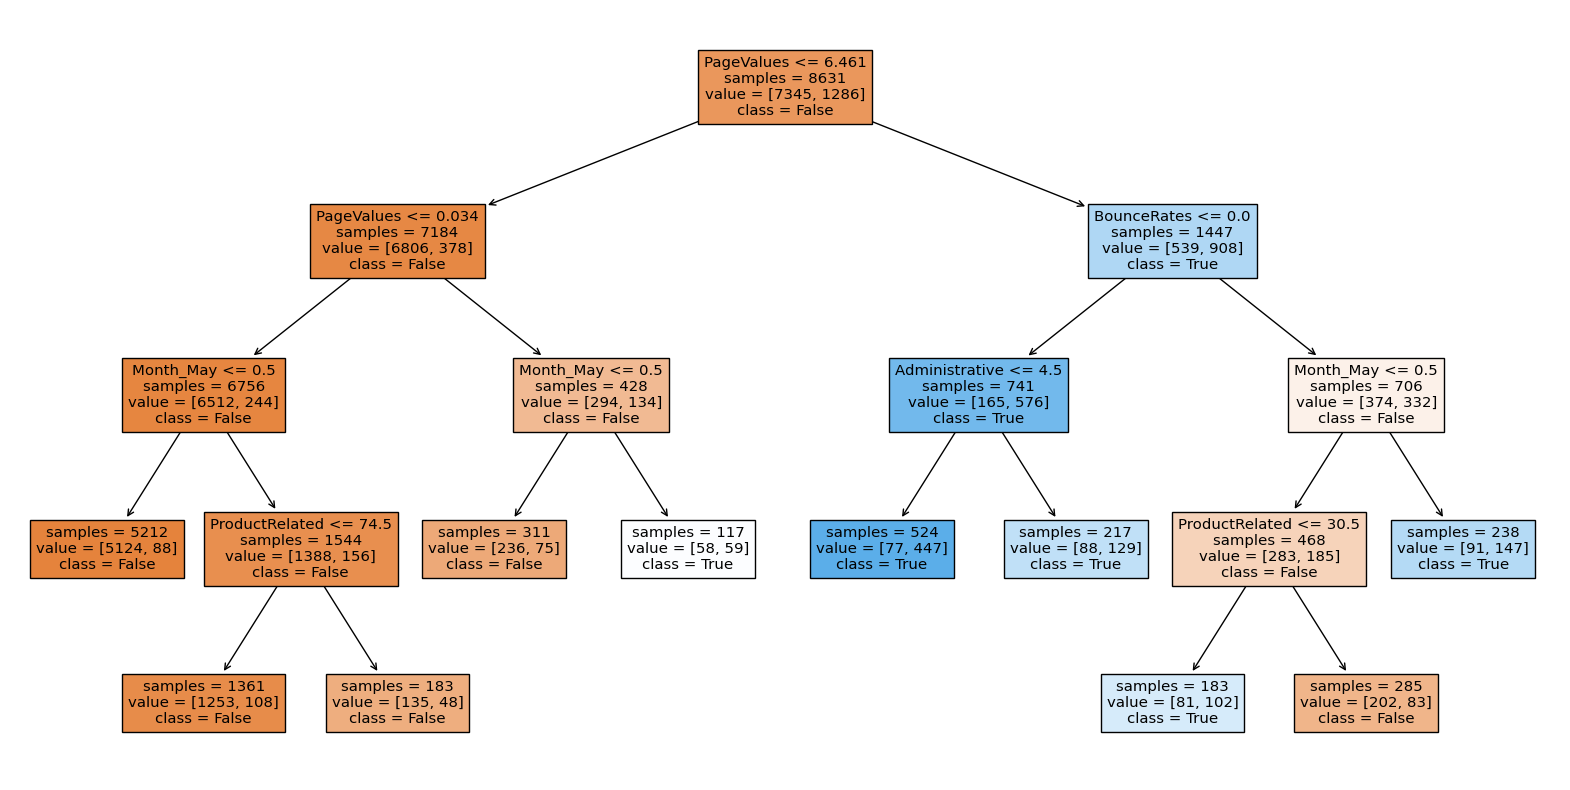

In [ ]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train, y_train)
# estimator dropped, estimator will be tree
grid_rf_tree.fit(x_train, y_train)
grid_rf_tree.score(x_test, y_test)

0.9168655630876109

In [42]:
pred_prob = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for Random Forest regression:", roc_auc_score(y_test, pred_prob))

AUC for Random Forest regression: 0.9168655630876109


In [60]:
y_gridrf_pred = grid_rf_tree.predict(x_test) 
my_matrix = confusion_matrix(y_test, y_gridrf_pred)
my_matrix
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 269
TN is: 3013
FP is: 64
FN is: 353


In [45]:
#Adaboost does not accept scoring as auc
from sklearn.ensemble import AdaBoostClassifier
dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train, y_train)

c:\Users\rucha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rucha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rucha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\rucha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          n_estimators=500, random_state=42),
             n_jobs=2,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [47]:
grid_ada_tree.best_params_
print(grid_ada_tree.best_estimator_.score(x_test, y_test)) #calculated based on accuracyy of best classifier

0.8810489321438226


In [48]:
pred_prob = grid_ada_tree.predict_proba(x_test)[:,1]
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob))

AUC for Adaboost: 0.9149396466052979


In [59]:
y_grid_ada_pred = grid_ada_tree.predict(x_test)
my_matrix = confusion_matrix(y_test, y_grid_ada_pred)
my_matrix
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 345
TN is: 2914
FP is: 163
FN is: 277


In [1]:
# Linear SVM with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

lr_svc = LinearSVC(random_state = 0, max_iter=10000)

params_svc = {'C': [0.01, 0.1, 1, 10]}

grid_lrsvc = GridSearchCV(lr_svc, params_svc, scoring = 'roc_auc', n_jobs = 2 )

grid_lrsvc.fit(x_train, y_train)



NameError: name 'x_train' is not defined

In [ ]:
# Linear SVM with GridSearchCV
print("Best parameter 'C':", grid_lrsvc.best_params_)

# evaluating the model
#print("Accuracy:", grid_lrsvc.best_score_)

Best parameter 'C': {'C': 1e-05}
Accuracy: 0.8874973916415783


In [53]:
print(grid_lrsvc.best_estimator_.score(x_test, y_test)) #with scoring method as accuracy of best model
print(grid_lrsvc.score(x_test, y_test)) #with scoring method as auc
#can not find AUC score as SVC doesnot have prodict proba

0.8705055420383887
0.8904766930665963


In [58]:
y_grid_lrsvc_pred = grid_lrsvc.predict(x_test)
my_matrix = confusion_matrix(y_test, y_grid_lrsvc_pred)
my_matrix
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 204
TN is: 3016
FP is: 61
FN is: 418


In [54]:
# Kernal SVM with GridSearchCV
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'rbf')
param_svc_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000]  ,
                    'gamma': [0.0001, 0.001,0.001,0.1,1,10]     }

grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, scoring = 'roc_auc', n_jobs=2)

grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],
                         'gamma': [0.0001, 0.001, 0.001, 0.1, 1, 10]},
             scoring='roc_auc')

In [55]:
print(grid_svc.best_estimator_.score(x_test, y_test)) #with scoring method as accuracy of best model
print(grid_svc.score(x_test, y_test)) #with scoring method as auc
#can not find AUC score as SVC doesnot have prodict proba

0.8453636117869695
0.8133334447989282


In [56]:
# Kernal SVM with GridSearchCV
print("Best parameters:", grid_svc.best_params_)

# evaluating the model
print("Accuracy:", grid_svc.best_score_)

Best parameters: {'C': 0.1, 'gamma': 0.0001}
Accuracy: 0.8403881219316174


In [57]:
y_grid_svc_pred = grid_svc.best_estimator_.predict(x_test)
my_matrix = confusion_matrix(y_test, y_grid_svc_pred)
my_matrix
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 58
TN is: 3069
FP is: 8
FN is: 564


In [140]:
#VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#log_clf = LogisticRegression(max_iter=10000, random_state=42)
#svm_clf = SVC(kernel = 'rbf', random_state=42) 
#nbg_clf = GaussianNB() 
#dt_clf= DecisionTreeClassifier(random_state = 42)

In [149]:
#from sklearn.ensemble import VotingClassifier
# define voting classifier
#voting_clf = VotingClassifier(
    #estimators = [  ('Logistic', log_clf)  ,('Kernel_SVM', svm_clf) , ('Gaussian_NB', nbg_clf ), ('Decision_Tree', dt_clf)], 
    #voting = 'hard') # when we want to soft every model should be able to generate probability here svm can not

# train the model
#voting_clf.fit(x_train, y_train)
# Performance Measure
#print("Test score for voting classifier is:", voting_clf.score(x_test, y_test))

c:\Users\rucha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score for voting classifier is: 0.8710462287104623


In [152]:
#pred_prob = voting_clf.predict_proba(x_test)[:,1]
#print("AUC for voting classifier:", roc_auc_score(y_test, pred_prob))
print()

In [47]:
# predict class probabilities for all classifiers
#probas = [c.fit(x_train, y_train).predict_proba(x_test) for c in (logreg, cat_nb, grid_ada_tree, grid_rf_tree, grid_tree_auc)]

# get class probabilities for the first sample in the dataset
#class1_1 = [pr[0, 0] for pr in probas]
#class2_1 = [pr[0, 1] for pr in probas]

In [46]:
#UPDATED BY MD
#Neural network
#using sigmoid activation and stochastic gradient descend
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', solver='sgd', max_iter=1000, random_state=42)
# Train the model
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = mlp.predict(x_test_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print("Test Accuracy:", accuracy)



Test Accuracy: 0.8840481052870434


In [52]:
#UPDATED BY MD
#PCA
from sklearn.decomposition import PCA

# Define the number of components 
n_components = 3  

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both training and test data
x_train_pca = pca.fit_transform(x_train_resampled)
x_test_pca = pca.transform(x_test_resampled)

# Now, x_train_pca and x_test_pca contain the transformed data with reduced dimensions

# Print the explained variance ratio to understand how much variance is explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Explained Variance Ratio: [0.98807488 0.00741709 0.00420641]
